In [2]:
# pip install tensorflow==2.0.0-beta1
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0-rc1


In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
dataset = load_breast_cancer()
type(dataset)

sklearn.utils.Bunch

In [6]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
# dataset.data.shape          (569, 30)
# dataset.target.shape        (569,)

In [0]:
# dataset.target_names        array(['malignant', 'benign'], dtype='<U9')
# dataset.feature_names       array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
#                                   'mean smoothness', 'mean compactness', 'mean concavity',
#                                   'mean concave points', 'mean symmetry', 'mean fractal dimension',
#                                   'radius error', 'texture error', 'perimeter error', 'area error',
#                                   'smoothness error', 'compactness error', 'concavity error',
#                                   'concave points error', 'symmetry error',
#                                   'fractal dimension error', 'worst radius', 'worst texture',
#                                   'worst perimeter', 'worst area', 'worst smoothness',
#                                   'worst compactness', 'worst concavity', 'worst concave points',
#                                   'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.33)
N, D = X_train.shape
# X_train.shape      (381, 30)
# y_train.shape      (381,)
# X_test.shape       (188, 30)
# y_test.shape       (188,)

In [0]:
# The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
# Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the 
# whole dataset (or feature in the multivariate case)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [0]:
model = Sequential()
model.add(Dense(1, input_dim=D, activation='sigmoid'))
# model = tf.keras.models.Sequential([
#                                     tf.keras.layers.Input(shape=(D,)),
#                                     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [0]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [14]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 2s 6ms/sample - loss: 0.8697 - accuracy: 0.2861 - val_loss: 0.8567 - val_accuracy: 0.2926
Epoch 2/100
381/381 [==============================] - 0s 177us/sample - loss: 0.7839 - accuracy: 0.3990 - val_loss: 0.7676 - val_accuracy: 0.4309
Epoch 3/100
381/381 [==============================] - 0s 183us/sample - loss: 0.7091 - accuracy: 0.5433 - val_loss: 0.6930 - val_accuracy: 0.5851
Epoch 4/100
381/381 [==============================] - 0s 180us/sample - loss: 0.6448 - accuracy: 0.6535 - val_loss: 0.6311 - val_accuracy: 0.6862
Epoch 5/100
381/381 [==============================] - 0s 206us/sample - loss: 0.5916 - accuracy: 0.7244 - val_loss: 0.5794 - val_accuracy: 0.7394
Epoch 6/100
381/381 [==============================] - 0s 200us/sample - loss: 0.5464 - accuracy: 0.7979 - val_loss: 0.5362 - val_accuracy: 0.7819
Epoch 7/100
381/381 [==============================] - 0s 177us/sample - l

Text(0.5, 1.0, 'Training & Test Loss')

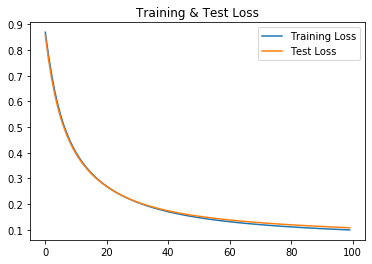

In [15]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Training & Test Loss')

Text(0.5, 1.0, 'Training & Test Accuracy')

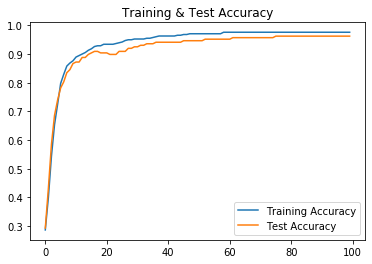

In [16]:
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Training & Test Accuracy')